# Trabalho Final Modelos Analíticos para Redes Sociais

In [89]:
require(igraph)

### Seleção do teste

In [90]:
#teste <- 'AIDS'
#teste <- 'E.COLI'
teste <- 'ZACHARY'
#teste <- 'ROUTER'
#teste <- 'POWER'

### Carrega dataset

In [91]:
# AIDS
if( teste == 'AIDS')
{
  g <- read_graph('./aids/AIDSBlog.txt', 'ncol') 
}

# ZACHARY
if( teste == 'ZACHARY')
{
    g <- read.graph('./zachary/zachary.txt', 'ncol')
}

# E.COLI
if( teste == 'E.COLI' )
{
    g <- read_graph('./e coli/e_coli_net.txt', 'ncol') 
    g_nodes <- read.table('./e coli/e_coli_nodes.txt')  # Para ler os pesos

    f <- function(x) g_nodes$V2[match(x, g_nodes$V1)] 
    res <- sapply(V(g), f) 
        
    V(g)$name <- res
}

# ROTEADORES
if( teste == 'ROUTER' )
{
  g <- read.graph('./roteadores/router_INET.txt', 'edgelist', directed = FALSE)
}

# SISTEMA ELÉTRICO
if( teste == 'POWER' )
{
  g <- read.graph('./power/power.gml',format='gml')
}

Configurações específicas

In [92]:
#slabel <- NULL #com_label
#slabel <- NA #sem_label


# AIDS
if( teste == 'AIDS')
{
  slabel <- NULL #sem_label
  vsize <- 12
}

# ZACHARY
if( teste == 'ZACHARY')
{
  slabel <- NULL #sem_label
  vsize <- 12
}

# E.COLI
if( teste == 'E.COLI' )
{
  slabel <- NA #sem_label
  vsize <- 5
}

# ROTEADORES
if( teste == 'ROUTER' )
{
  slabel <- NA #sem_label
  vsize <- 1
}

# SISTEMA ELÉTRICO
if( teste == 'POWER' )
{
  #slabel <- NULL #com_label
  slabel <- NA #sem_label
  vsize <- 5
}


### Analisando a rede

In [93]:
# Sumário
summary(g)

g

IGRAPH c08bd98 UNW- 34 78 -- 
+ attr: name (v/c), weight (e/n)


IGRAPH c08bd98 UNW- 34 78 -- 
+ attr: name (v/c), weight (e/n)
+ edges from c08bd98 (vertex names):
 [1] 1 --2  1 --3  1 --4  1 --5  1 --6  1 --7  1 --8  1 --9  1 --11 1 --12
[11] 1 --13 1 --14 1 --18 1 --20 1 --22 1 --32 2 --3  2 --4  2 --8  2 --14
[21] 2 --18 2 --20 2 --22 2 --31 3 --4  3 --8  3 --9  3 --10 3 --14 3 --28
[31] 3 --29 3 --33 4 --8  4 --13 4 --14 5 --7  5 --11 6 --7  6 --11 6 --17
[41] 7 --17 9 --31 9 --33 9 --34 10--34 14--34 33--15 34--15 33--16 34--16
[51] 33--19 34--19 20--34 33--21 34--21 33--23 34--23 24--26 28--24 24--30
[61] 33--24 34--24 26--25 28--25 32--25 32--26 30--27 34--27 28--34 32--29
[71] 29--34 33--30 34--30 31--33 31--34 32--33 32--34 33--34

### Plotando a rede

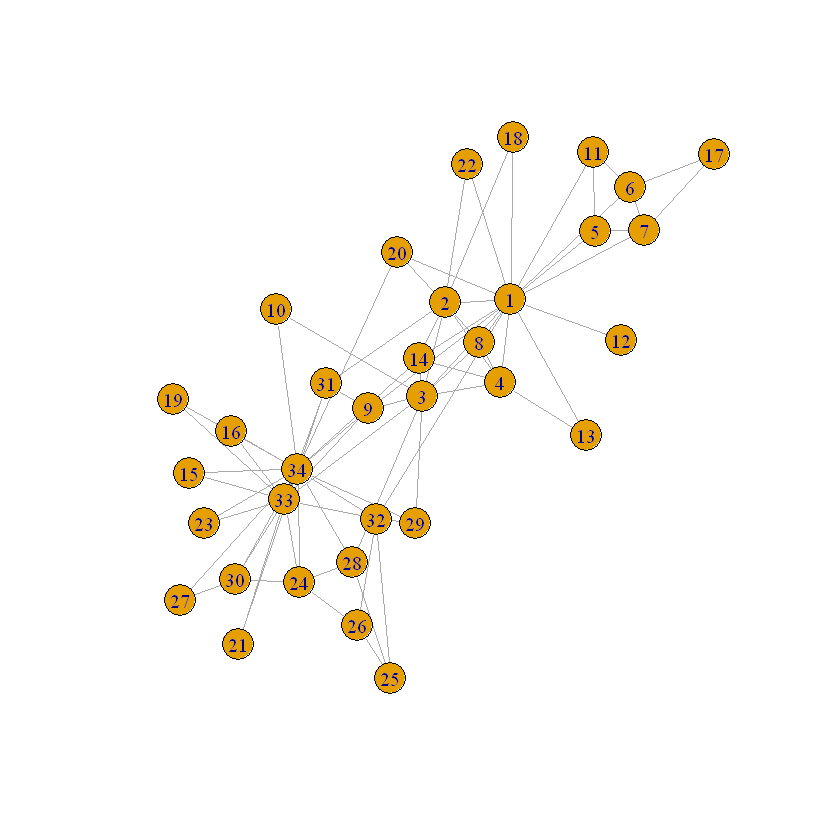

In [94]:
# Para e.coli
if( teste == 'E.COLI' )
{
  E(g)$color = ifelse(E(g)$weight > 1, 'purple', ifelse(E(g)$weight == 2, 'green', 'blue'))

  g1 <- subgraph.edges(g, which(E(g)$weight == 1), delete.vertices = T)
  g2 <- subgraph.edges(g, which(E(g)$weight == 2), delete.vertices = T)
  g3 <- subgraph.edges(g, which(E(g)$weight == 3), delete.vertices = T)

  plot(g1, layout = layout.auto, vertex.label=slabel, vertex.size=vsize)
  plot(g2, layout = layout.auto, vertex.label=slabel, vertex.size=vsize)
  plot(g3, layout = layout.auto, vertex.label=slabel, vertex.size=vsize)

} else {
  plot(g, layout = layout.auto, vertex.label=slabel, vertex.size=vsize)
}

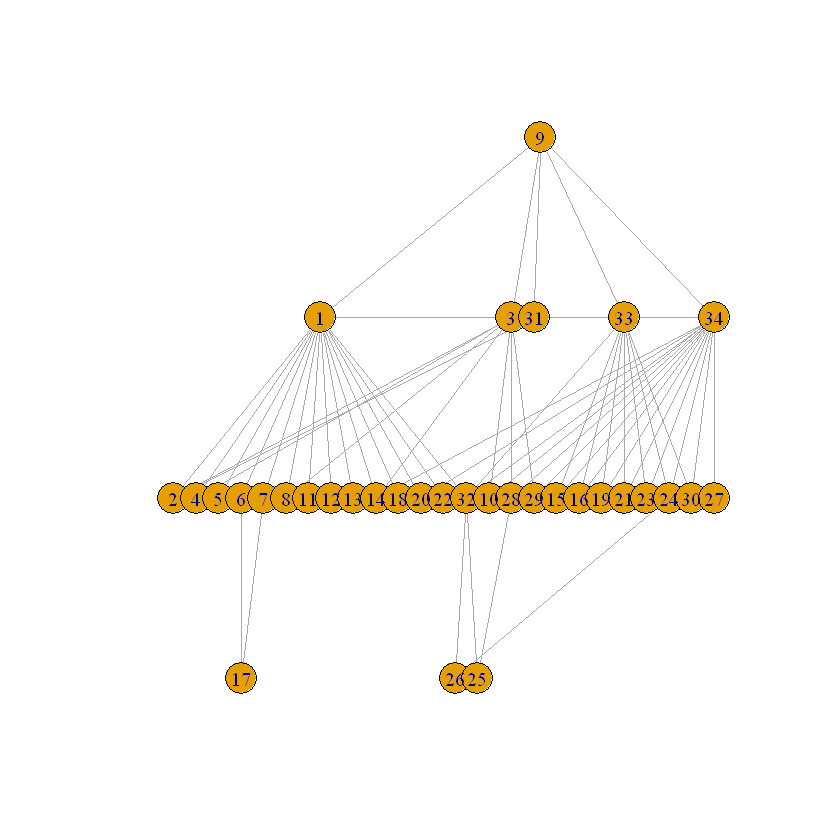

In [95]:
if( teste != 'E.COLI' ) {
    plot(g, layout = layout_as_tree, vertex.label=slabel, vertex.size=vsize)
}

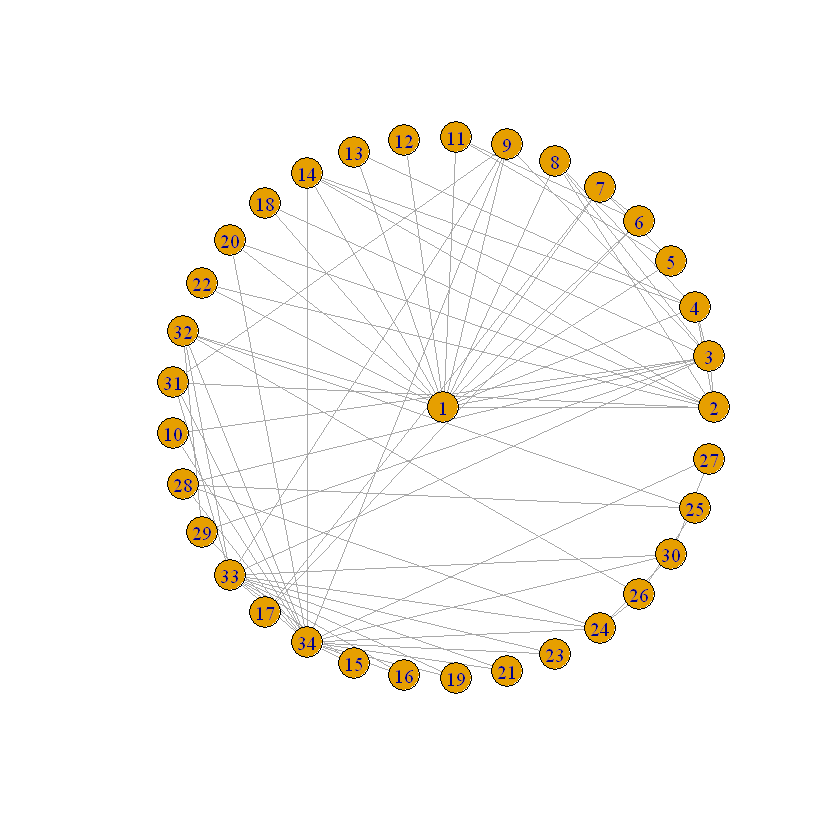

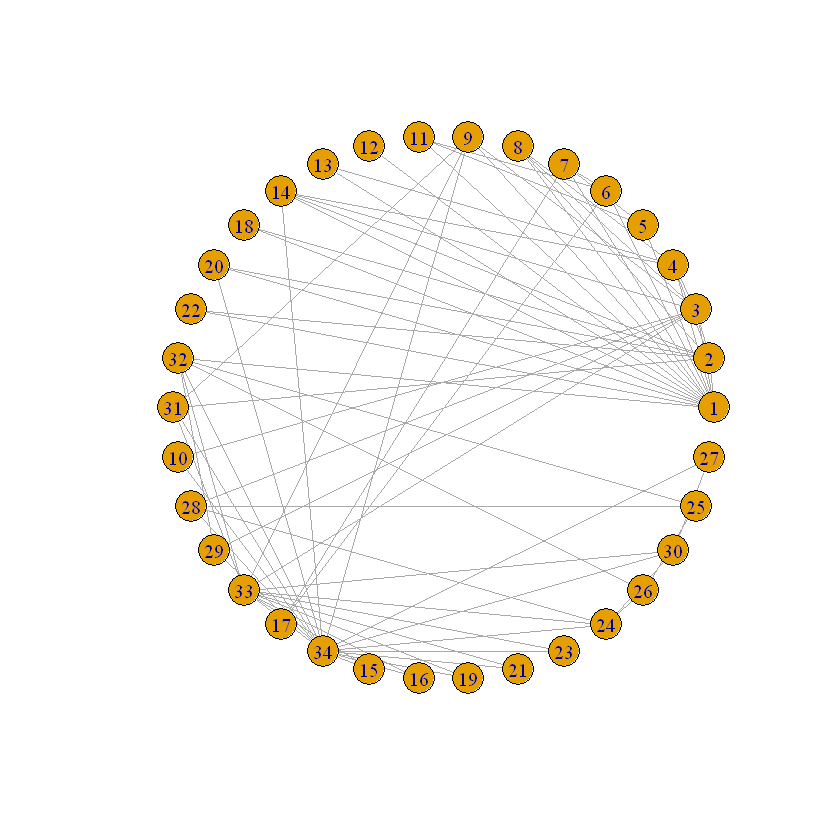

In [96]:
if( teste != 'E.COLI' ) {
    plot(g, layout = layout_as_star, vertex.label=slabel, vertex.size=vsize)

    plot(g, layout = layout.circle, vertex.label=slabel, vertex.size=vsize)
}

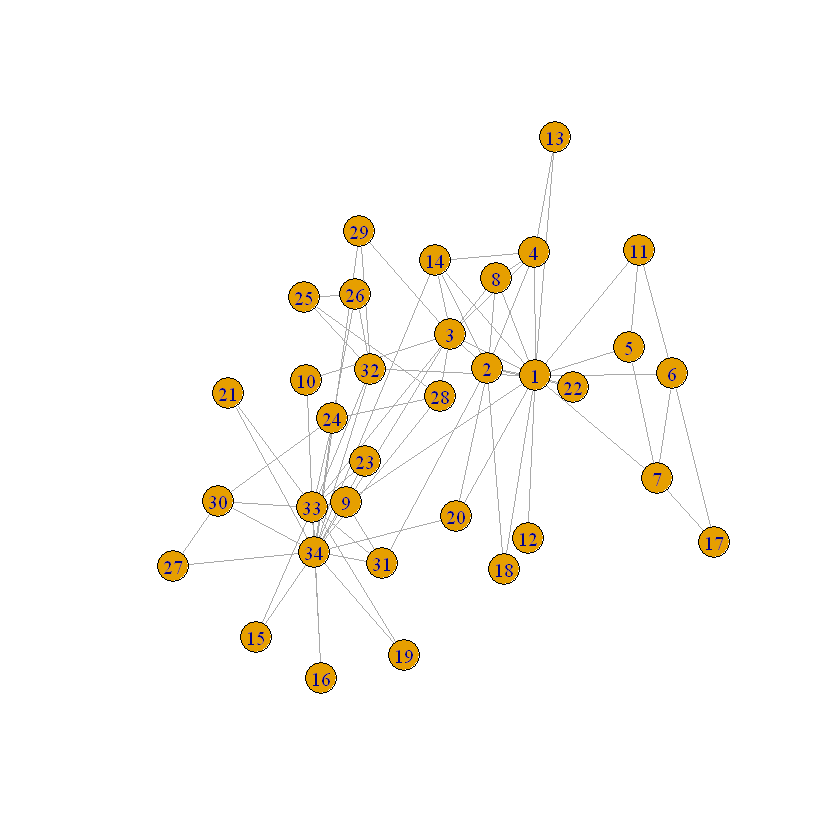

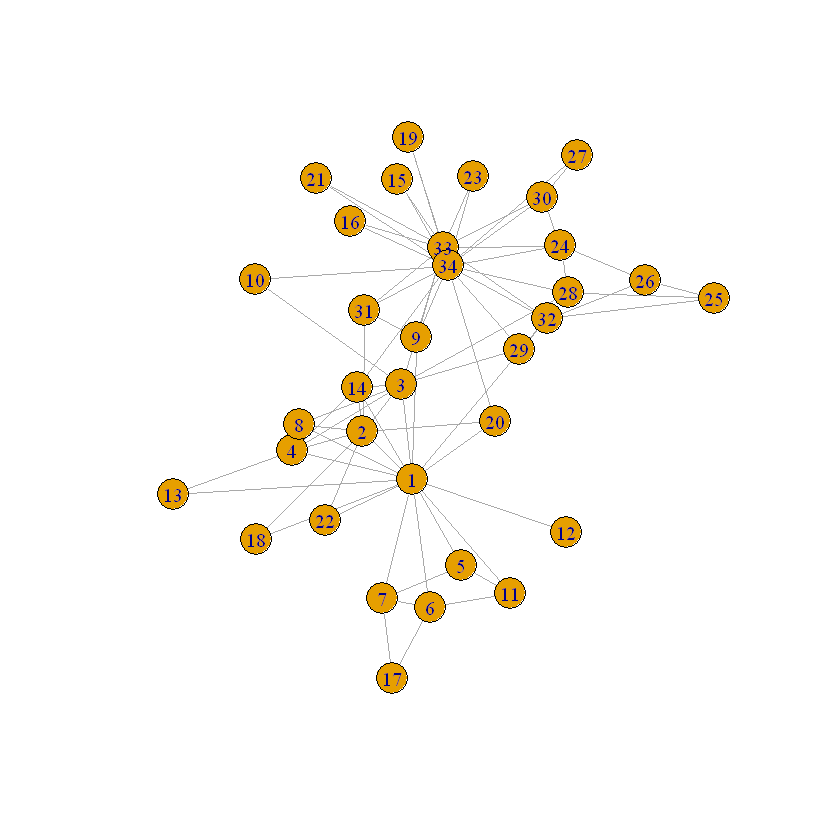

In [97]:
if( teste != 'E.COLI' ) {
    plot(g, layout = layout.drl, vertex.label=slabel, vertex.size=vsize)

    plot(g, layout = layout.fruchterman.reingold, vertex.label=slabel, vertex.size=vsize)
}

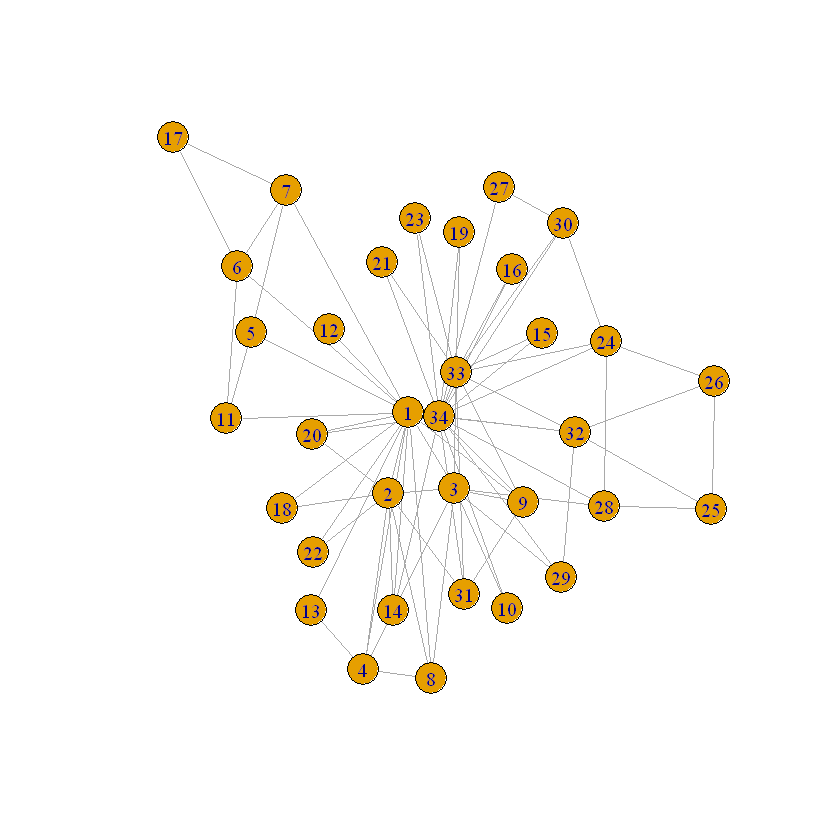

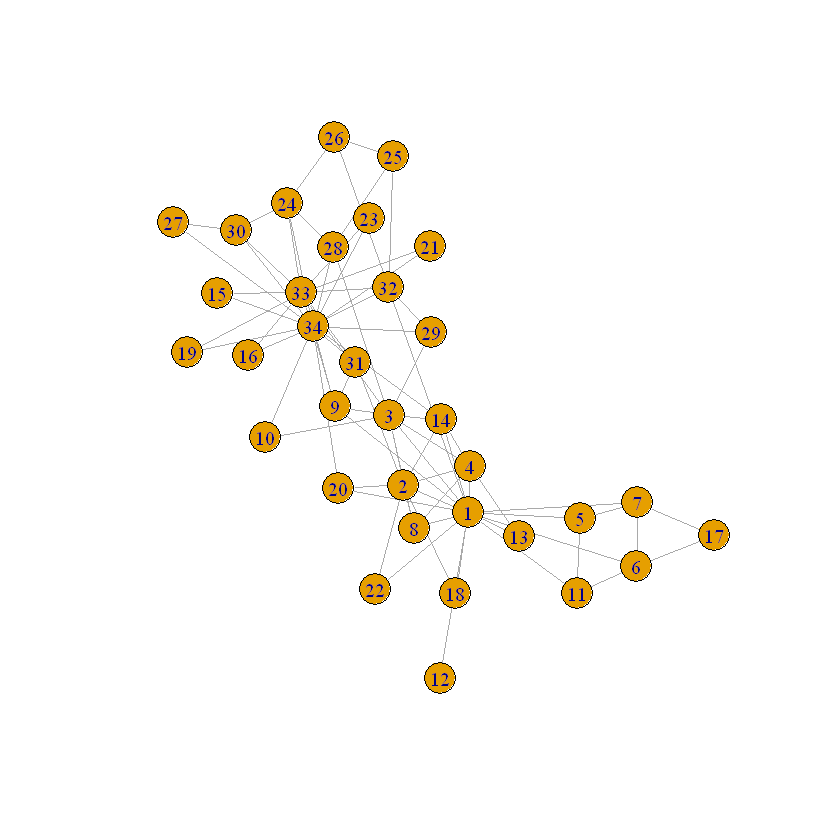

In [98]:
if( teste != 'POWER' & teste != 'E.COLI')
{
    plot(g, layout = layout.gem, vertex.label=slabel, vertex.size=vsize)
    plot(g, layout = layout.graphopt, vertex.label=slabel, vertex.size=vsize)
}

Warning message:
"layout.grid.3d is deprecated from
igraph 0.8.0, please use layout_on_grid instead"


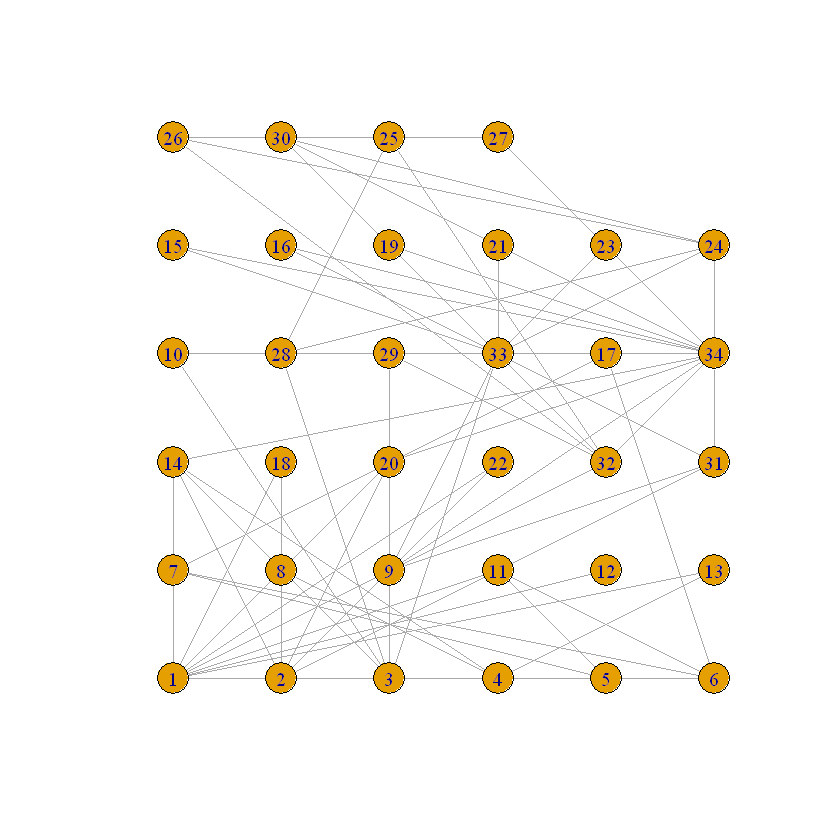

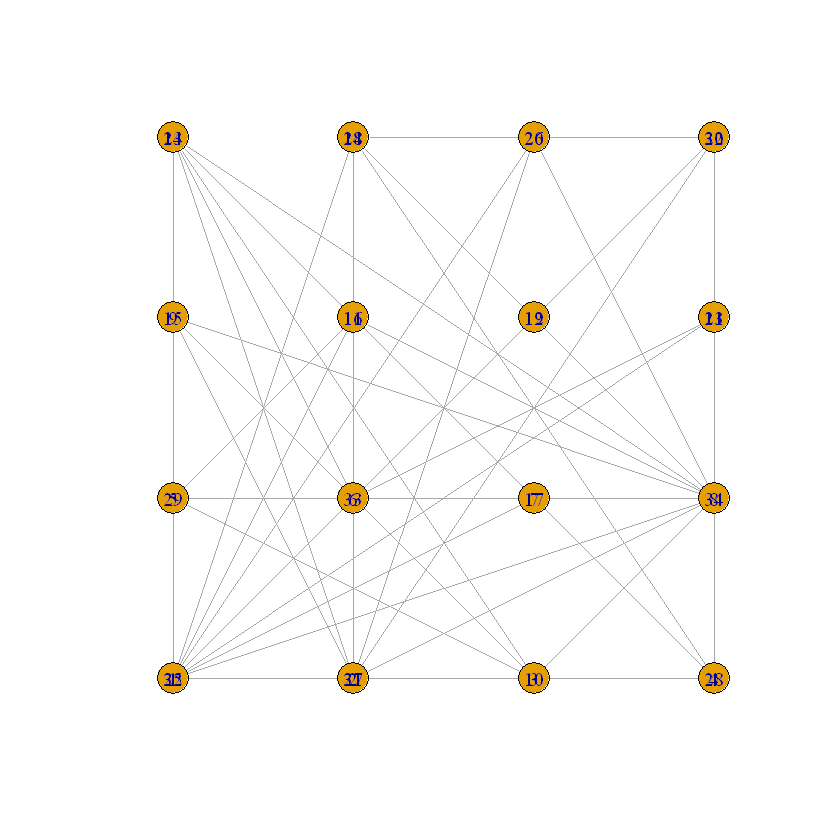

In [99]:
if( teste != 'E.COLI' ) {
    plot(g, layout = layout.grid, vertex.label=slabel, vertex.size=vsize)

    plot(g, layout = layout.grid.3d, vertex.label=slabel, vertex.size=vsize)
}

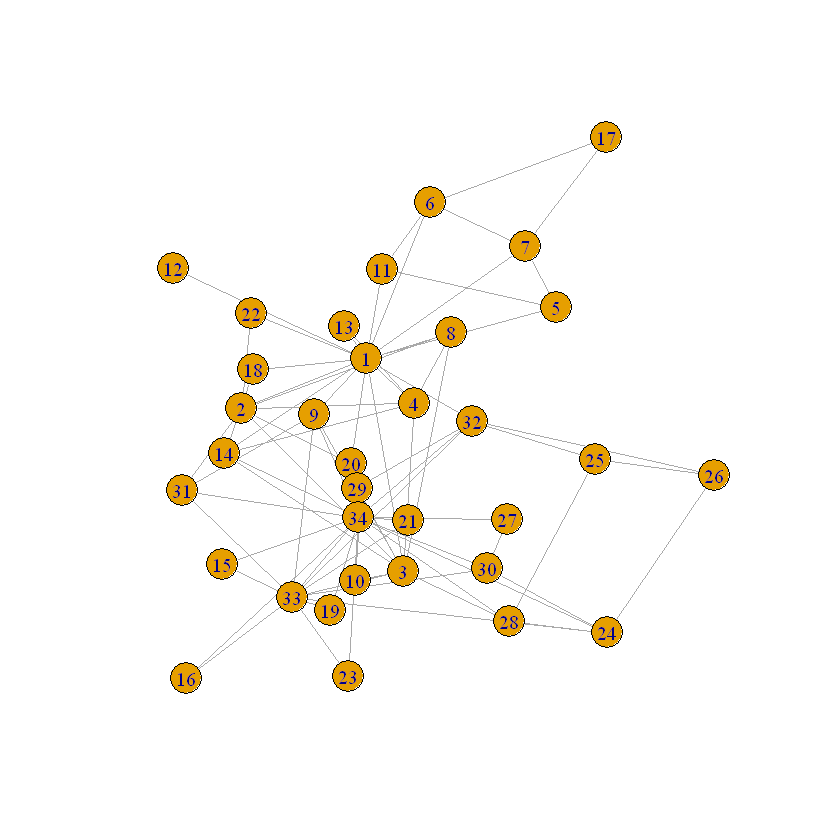

In [100]:
if( teste != 'E.COLI' ) {
    plot(g, layout = layout.kamada.kawai, vertex.label=slabel, vertex.size=vsize)
}

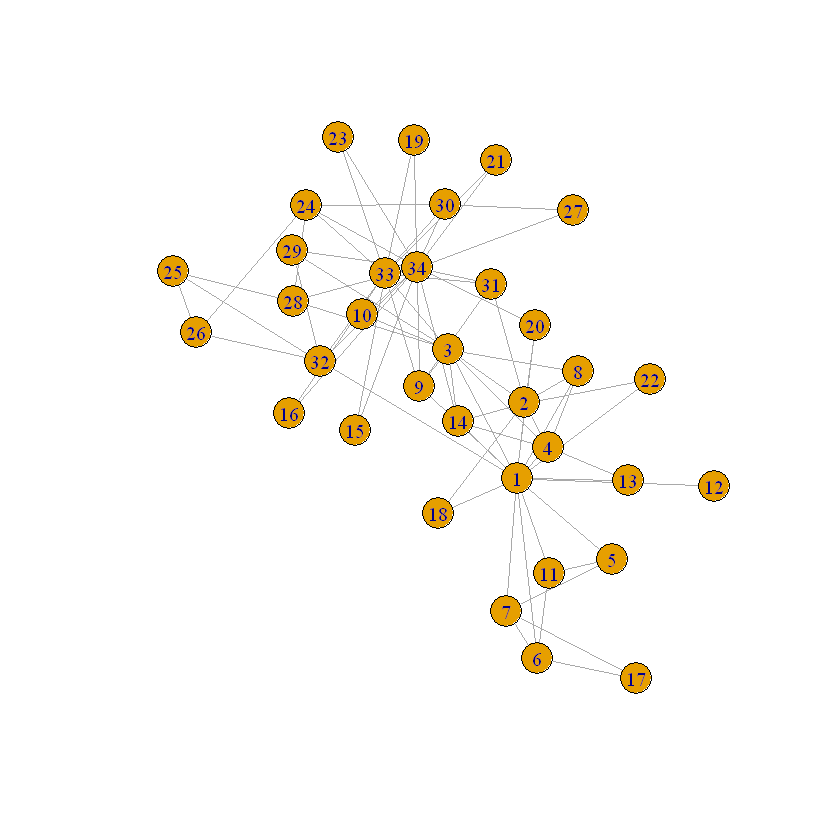

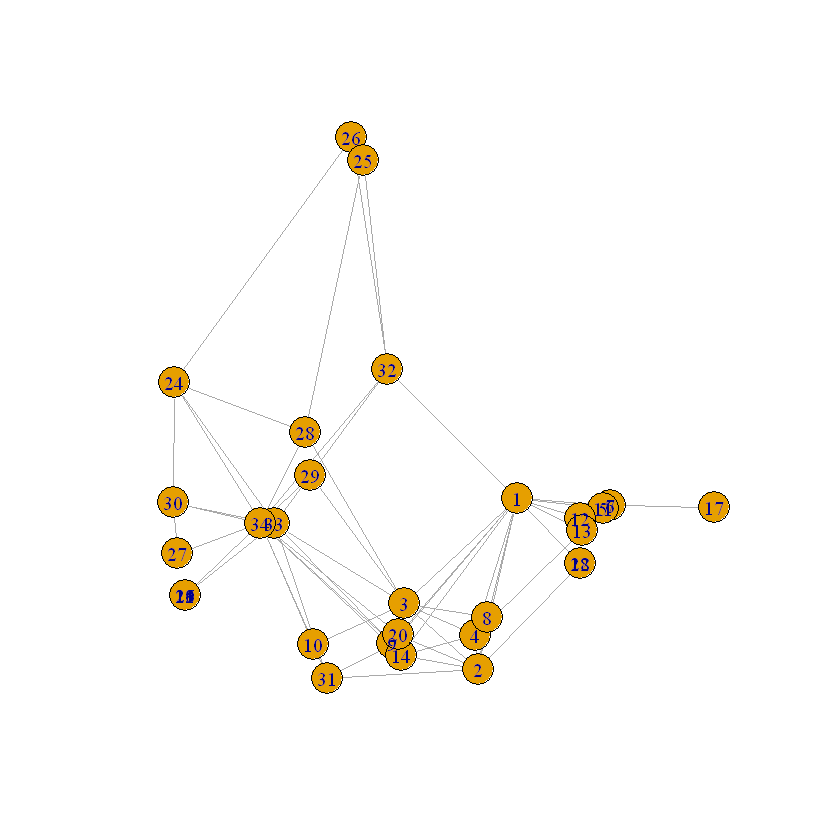

In [101]:
if( teste != 'E.COLI' ) {
    plot(g, layout = layout.lgl, vertex.label=slabel, vertex.size=vsize)

    plot(g, layout = layout.mds, vertex.label=slabel, vertex.size=vsize)
}

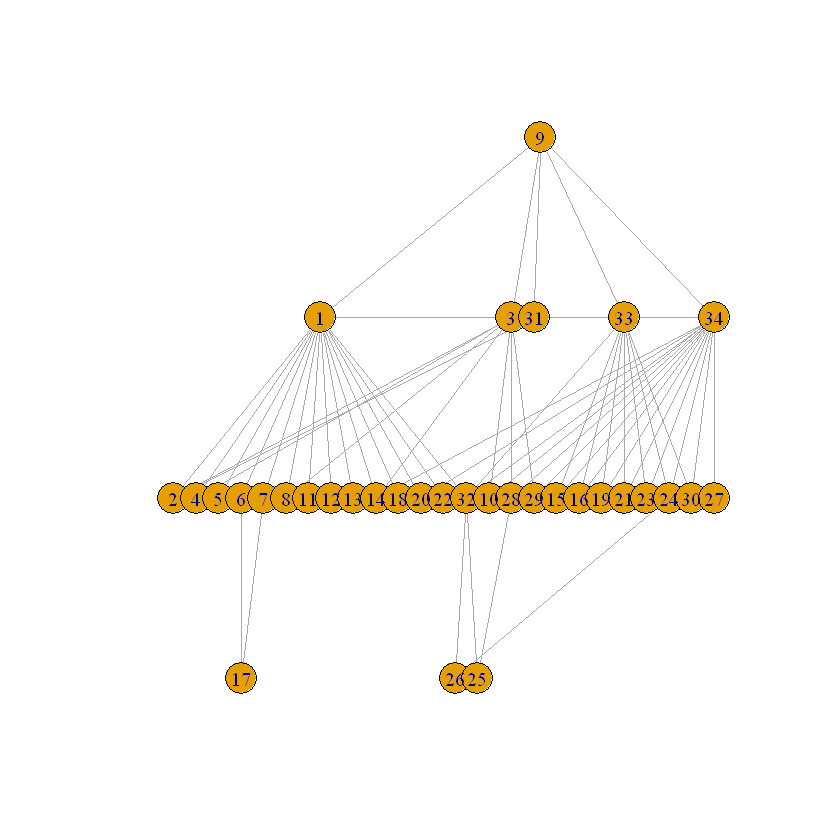

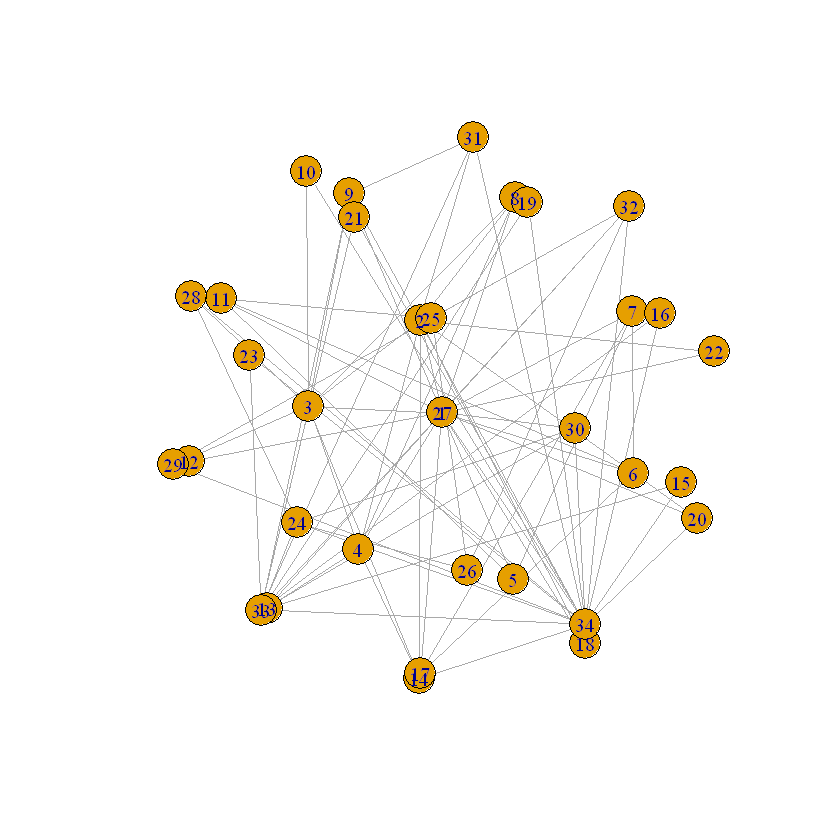

In [102]:
if( teste != 'E.COLI' ) {
    plot(g, layout = layout.reingold.tilford, vertex.label=slabel, vertex.size=vsize)

    plot(g, layout = layout.sphere, vertex.label=slabel, vertex.size=vsize)
}

### Métricas

Grau

In [103]:
# Grau
#degree(g)

if( teste != 'E.COLI' ) {
    # Grau médio
    mean(degree(g))

} else {
    # Grau médio
    print(mean(degree(g1)))
    print(mean(degree(g2)))
    print(mean(degree(g3)))
}

[1] 4.588235

Distância

In [104]:
# Distância média
if( teste != 'E.COLI' ) {
    mean_distance(g)

} else {
    print(mean_distance(g1))
    print(mean_distance(g2))
    print(mean_distance(g3))
}

[1] 5.754011

Coeficiente de Clusterização

In [105]:
if( teste != 'E.COLI' ) {
    transitivity(g, type="global") * 100 # Em %

} else {
    print(transitivity(g1, type="global") * 100)
    print(transitivity(g2, type="global") * 100)
    print(transitivity(g3, type="global") * 100)
}

[1] 25.56818

Histograma de Grau

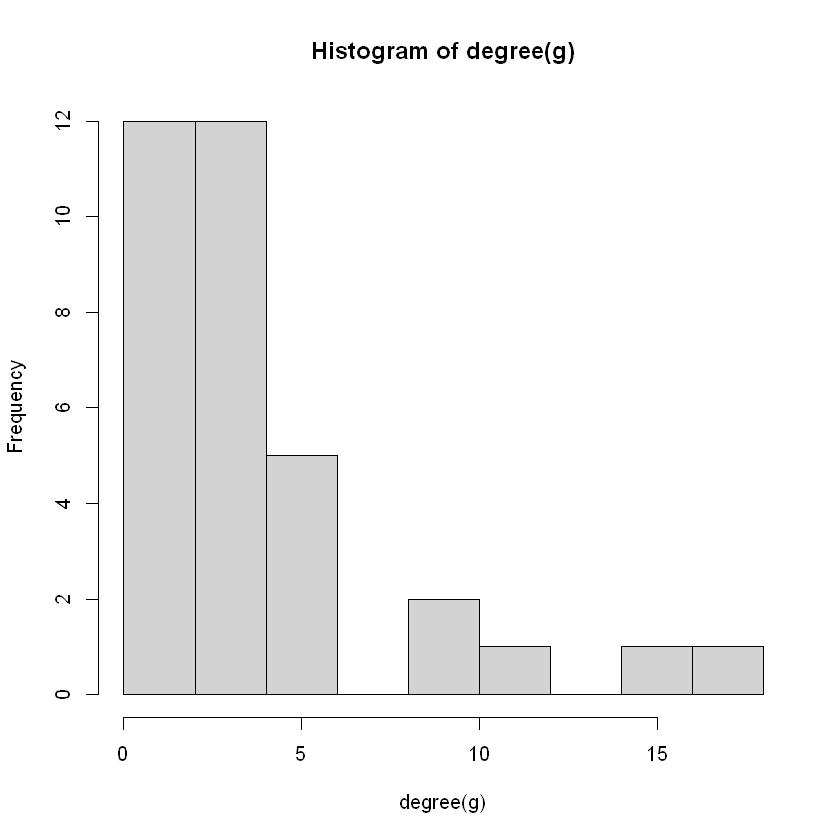

In [106]:
# Histograma
if( teste != 'E.COLI' ) {
    summary(degree(g))
    hist(degree(g))
} else {
    hist(degree(g1))
    hist(degree(g2))
    hist(degree(g3))
}

Nó mais importante (Betweeness)

In [107]:
# Nó mais importante (Centralidade de intermediação)
if( teste != 'E.COLI' ) {
    b <- which.max(betweenness(g))

    b
    betweenness(g, v=b)
} else {
    b1 <- which.max(betweenness(g1, weights = NA))
    print(b1)
    print(betweenness(g1, v=b1, weights = NA))
    print(cat('\n'))

    b2 <- which.max(betweenness(g2, weights = NA))
    print(b2)
    print(betweenness(g2, v=b2, weights = NA))
    print(cat('\n'))

    b3 <- which.max(betweenness(g3, weights = NA))
    print(b3)
    print(betweenness(g3, v=b3, weights = NA))
}

1 
250.15

Nó mais central (Closeness)

In [108]:
# Score para o nó mais perto (Centralidade de proximidade)
if( teste != 'E.COLI' ) {
    c <- which.max(closeness(g))

    c
    closeness(g, v=c)
} else {
    c1 <- which.max(closeness(g1))
    print(c1)
    print(closeness(g1, v=c1))
    print(cat('\n'))

    c2 <- which.max(closeness(g2))
    print(c2)
    print(closeness(g2, v=c2))
    print(cat('\n'))

    c3 <- which.max(closeness(g3))
    print(c3)
    print(closeness(g3, v=c3))
    print(cat('\n'))

}

1 
0.007692308

Aresta mais importante

In [109]:
# Aresta mais importante (Centralidade de intermediação)
if( teste != 'E.COLI' ) {
    aresta_importante <- which.max(edge_betweenness(g))

    ends(g, E(g)[aresta_importante])
    edge_betweenness(g, e=aresta_importante)
} else {
    aresta_importante1 <- which.max(edge_betweenness(g1, weights = NA ))
    print(ends(g1, E(g1)[aresta_importante1]))
    print(edge_betweenness(g1, e=aresta_importante1, weights = NA ))
    print(cat('\n'))

    aresta_importante2 <- which.max(edge_betweenness(g2, weights = NA ))
    print(ends(g2, E(g2)[aresta_importante2]))
    print(edge_betweenness(g2, e=aresta_importante2, weights = NA ))
    print(cat('\n'))

    aresta_importante3 <- which.max(edge_betweenness(g3, weights = NA ))
    print(ends(g3, E(g3)[aresta_importante3]))
    print(edge_betweenness(g3, e=aresta_importante3))
    print(cat('\n'))
}


[1] 142.5667

Plota aresta mais importante

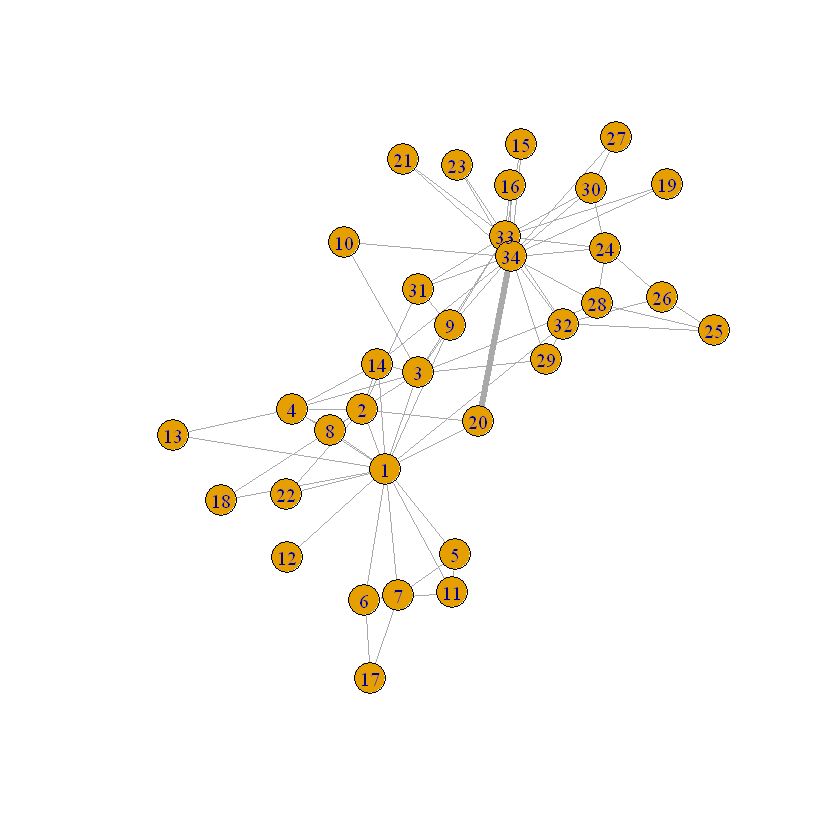

In [110]:
# Destaca a aresta mais importante
plot(g, edge.colour = ifelse(E(g) == aresta_importante, 'red', 'gray'),
         edge.width = ifelse(E(g) == aresta_importante, 5, 1),
         vertex.label=slabel, vertex.size=vsize)


Diâmetro

In [111]:
# Diâmetro da rede
if( teste != 'E.COLI' ) {
  diameter(g)
  get_diameter(g)
} else {
  print(diameter(g1, weights = NA))
  print(get_diameter(g1, weights = NA))
  print(cat('\n'))

  print(diameter(g2, weights = NA))
  print(get_diameter(g2, weights = NA))
  print(cat('\n'))

  print(diameter(g3, weights = NA))
  print(get_diameter(g3, weights = NA))
  print(cat('\n'))
}


+ 5/34 vertices, named, from c08bd98:
[1] 28 3  1  7  17

Comunidade

Warning message in cluster_edge_betweenness(g):
"At core/community/edge_betweenness.c:492 : Membership vector will be selected based on the highest modularity score."


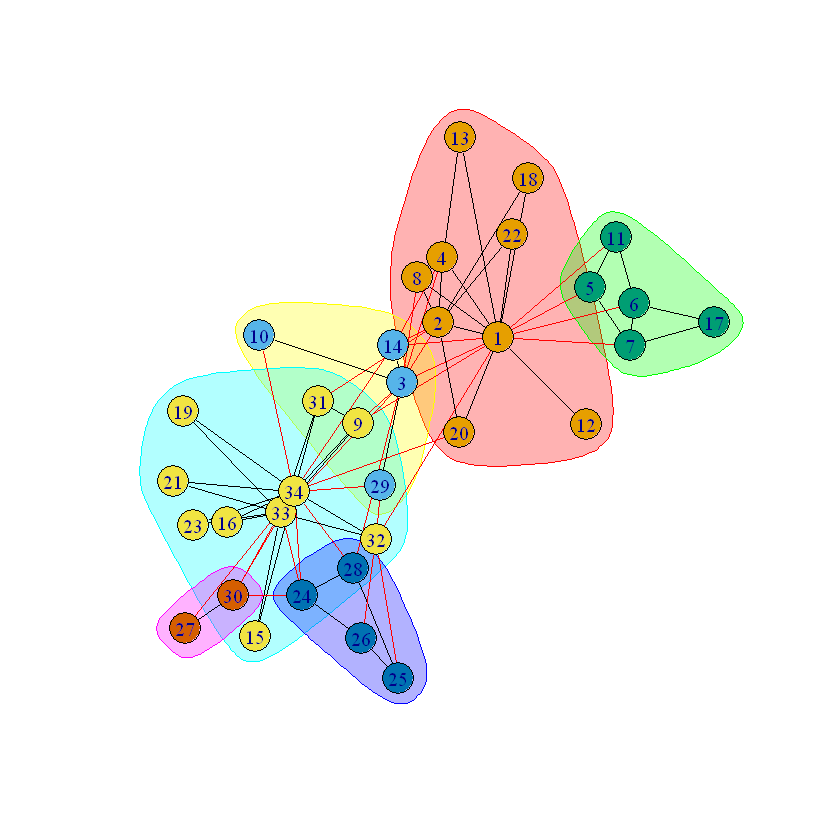

In [112]:
# COMUNIDADE
ceb <- cluster_edge_betweenness(g)
#dendPlot(ceb, mode="hclust")
plot(ceb, g, vertex.label=slabel, vertex.size=vsize)

if( teste == 'E.COLI' )
{
  ceb1 <- cluster_edge_betweenness(g1)
  plot(ceb1, g1, vertex.label=slabel, vertex.size=vsize)

  ceb2 <- cluster_edge_betweenness(g2)
  plot(ceb2, g2, vertex.label=slabel, vertex.size=vsize)

  ceb3 <- cluster_edge_betweenness(g3)
  plot(ceb3, g3, vertex.label=slabel, vertex.size=vsize)
}
